Episode:0 avg:18.0 min:18.0 max:18.0
Episode:10 avg:24.4 min:9.0 max:45.0
Episode:20 avg:23.0 min:11.0 max:47.0
Episode:30 avg:20.5 min:12.0 max:37.0
Episode:40 avg:23.1 min:10.0 max:52.0
Episode:50 avg:18.8 min:11.0 max:38.0
Episode:60 avg:22.2 min:10.0 max:47.0
Episode:70 avg:21.3 min:14.0 max:41.0
Episode:80 avg:23.6 min:12.0 max:48.0
Episode:90 avg:19.3 min:11.0 max:46.0
Episode:100 avg:19.8 min:10.0 max:31.0
Episode:110 avg:21.2 min:9.0 max:46.0
Episode:120 avg:21.5 min:13.0 max:34.0
Episode:130 avg:19.5 min:10.0 max:36.0
Episode:140 avg:27.8 min:13.0 max:44.0
Episode:150 avg:22.4 min:10.0 max:51.0
Episode:160 avg:28.9 min:10.0 max:56.0
Episode:170 avg:20.3 min:9.0 max:51.0
Episode:180 avg:27.7 min:15.0 max:44.0
Episode:190 avg:24.0 min:11.0 max:40.0
Episode:200 avg:25.3 min:9.0 max:38.0
Episode:210 avg:15.6 min:10.0 max:33.0
Episode:220 avg:18.6 min:9.0 max:62.0
Episode:230 avg:29.2 min:10.0 max:101.0
Episode:240 avg:22.5 min:10.0 max:60.0
Episode:250 avg:28.0 min:11.0 max:58.0
E

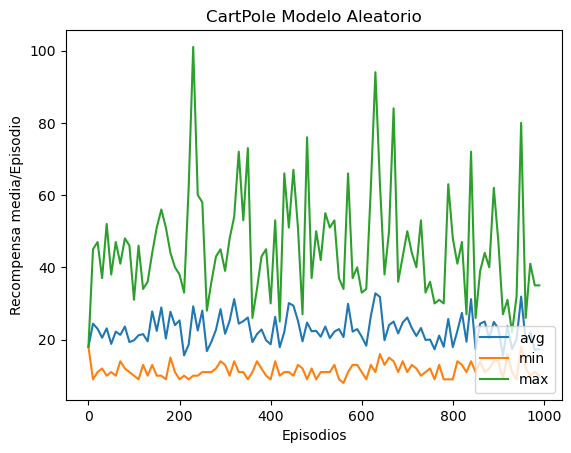

In [6]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt

# Inicialización del entorno CartPole
env = gym.make("CartPole-v1")

# Parámetros del entorno
episodes = 1000
episodes_display = 10

# Para almacenar las recompensas totales
ep_rewards = []
ep_rewards_table = {'ep': [], 'avg': [], 'min': [], 'max': []}

for episode in range(episodes):
    episode_reward = 0
    state = env.reset()[0]  # Obtener el estado inicial
    done = False
    i = 0  # Contador para el paso del tiempo
    
    # Determinar si se debe renderizar el estado en este episodio
    render_state = episode % episodes_display == 0

    while not done:
        action = random.choice([0, 1])  # Selección aleatoria de la acción (izquierda o derecha)
        
        # Ejecutar la acción en el entorno
        new_state, reward, done, _, _ = env.step(action)  # Quitamos los valores no utilizados
        
        # Renderizar el estado si es necesario
        if render_state:
            env.render()
        
        i += 1
        state = new_state
        episode_reward += reward

    ep_rewards.append(episode_reward)
    
    if episode % episodes_display == 0: 
        avg_reward = sum(ep_rewards[-episodes_display:])/len(ep_rewards[-episodes_display:])  # Mostrar resultados
        ep_rewards_table['ep'].append(episode)
        ep_rewards_table['avg'].append(avg_reward)
        ep_rewards_table['min'].append(min(ep_rewards[-episodes_display:]))
        ep_rewards_table['max'].append(max(ep_rewards[-episodes_display:]))          
        print(f"Episode:{episode} avg:{avg_reward} min:{min(ep_rewards[-episodes_display:])} max:{max(ep_rewards[-episodes_display:])}")

env.close()

# Representación gráfica de los resultados
plt.plot(ep_rewards_table['ep'], ep_rewards_table['avg'], label="avg")
plt.plot(ep_rewards_table['ep'], ep_rewards_table['min'], label="min")
plt.plot(ep_rewards_table['ep'], ep_rewards_table['max'], label="max")
plt.legend(loc=4)
plt.title('CartPole Modelo Aleatorio')
plt.ylabel('Recompensa media/Episodio')
plt.xlabel('Episodios')
plt.show()

# Cálculo de la media móvil
window_size = 100
moving_avg_rewards = np.convolve(ep_rewards, np.ones(window_size)/window_size, mode='valid')


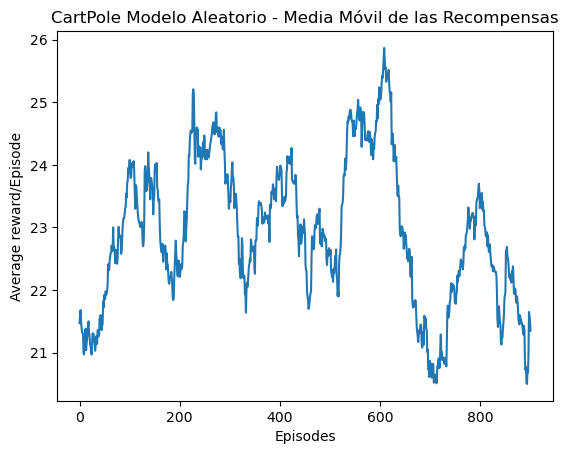

Tasa de convergencia: -0.006999999999999993


In [7]:
# Cálculo de la media móvil
window_size = 100
moving_avg_rewards = np.convolve(ep_rewards, np.ones(window_size)/window_size, mode='valid')

# Graficar la recompensa promedio móvil
plt.plot(np.arange(len(moving_avg_rewards)), moving_avg_rewards)
plt.title('CartPole Modelo Aleatorio - Media Móvil de las Recompensas')
plt.ylabel('Average reward/Episode')
plt.xlabel('Episodes')
plt.show()

# Calcular la tasa de convergencia
convergence_rate = (ep_rewards_table['avg'][-1] - ep_rewards_table['avg'][0]) / len(ep_rewards_table['avg'])
print("Tasa de convergencia:", convergence_rate)
